In [25]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/media/paulati/Nuevo vol/paula/dh/2021/dsad_2021_paula/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


# Visualización 2 - plotly

---


<a id="section_toc"></a> 
## Tabla de Contenidos

[Intro](#section_intro)

[Imports](#section_imports)

[`plotly.express`](#section_plotly_express)

[Plotly offline](#section_plotly_offline)

[Plotly online](#section_plotly_online)

[Privacidad](#section_privacidad)

[Bar charts](#section_bar_charts)

[Scatter](#section_scatter)

[Facets](#section_facets)

[Animaciones](#section_animaciones)

[Ejercicio](#section_ejercicio)

[Referencias](#section_referencias)


---

<a id="section_intro"></a> 
## Intro

[volver a TOC](#section_toc)

    
Plotly ofrece un servicio web para hostear gráficos. 
    
**Para empezar, necesitamos crear una cuenta en https://chart-studio.plotly.com/**

Los gráficos se guardan dentro de la cuenta de Plotly en línea. El alojamiento público es gratuito, para alojamiento privado tienen planes pagos.

Las versiones anteriores de plotly.py contenían funcionalidades para crear figuras en los modos "online" y "offline". En el modo "online", las visualizaciones se subian al servicio en la nube de Chart Studio , mientras que en el modo "offline" las visualizaciones se generaban localmente. La versión 4 de plotly es completamente-"offline": toda la funcionalidad "online" se eliminó del paquete de distribución principal de plotly y está disponible en el nuevo paquete de distribución de chart-studio.

    

<a id="section_imports"></a> 
## Imports

[volver a TOC](#section_toc)


In [26]:
import numpy as np
import pandas as pd
#import plotly
import plotly.express as px
import chart_studio
import chart_studio.plotly as py

<a id="section_plotly_express"></a> 
## `plotly.express`

[volver a TOC](#section_toc)


Plotly Express es una "wrapper" de alto nivel para Plotly, esencialmente significa que hace muchas de las tareas que podemos hacer con Plotly con una sintaxis más simple. Es fácil de usar y no requiere especificar si queremos trabajar online u offline.

Todas las funciones de Plotly Express devuelven un objeto de tipo `graph_objects.Figure` cuyos datos y layout se definen de acuerdo a los argumentos provistos.

En general podremos usar 
`import plotly.express as px`
en lugar de 
`import plotly.graph_objects as go`

Y reemplazar `fig = go.Figure()` por cualquier función de Plotly Express, por ejemplo `px.bar(...)`

Funciones disponibles:
https://plotly.com/python-api-reference/plotly.express.html

<a id="section_plotly_offline"></a> 
## Plotly offline

[volver a TOC](#section_toc)

Plotly offline nos permite crear gráficos y guardarlos localmente (no requiere de una conexión a internet).

Ejemplo:

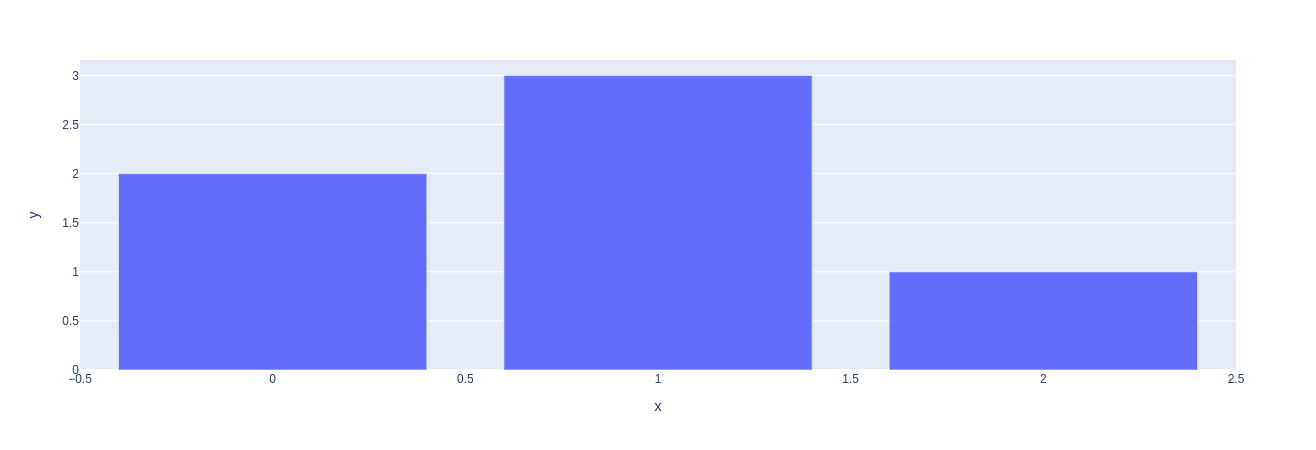

In [27]:
# px es plotly express
fig = px.bar(y=[2, 3, 1])
fig.show() # muestra el gráfico en la celda de abajo

In [28]:
fig.write_image("fig1_offline.png") # guarda el gráfico en un archivo

<a id="section_plotly_online"></a> 
## Plotly online (chart-studio)

[volver a TOC](#section_toc)


Cuando graficamos online, el gráfico y los datos se guardan en nuestra cuenta plotly en la nube.

Usando el método `plot` de `chart_studio.plotly` guardamos el gráfico generado en la nube y estableciendo `auto_open=True` se muestra en una nueva pestaña del browser. Estableciéndolo en False, sólo se guarda en la nube.

Ejemplo:

Seteamos el nombre de usuario y api-key que usaremos para conectarnos, y luego mostramos el gráfico en la notebook, lo guardamos en la nube, y lo mostramos en una nueva pestaña del browser

In [29]:
#chart-studio api
username = 'your_username' # your username
api_key = 'your_apikey' # your api api_key

chart_studio.tools.set_credentials_file(username=username, api_key=api_key)


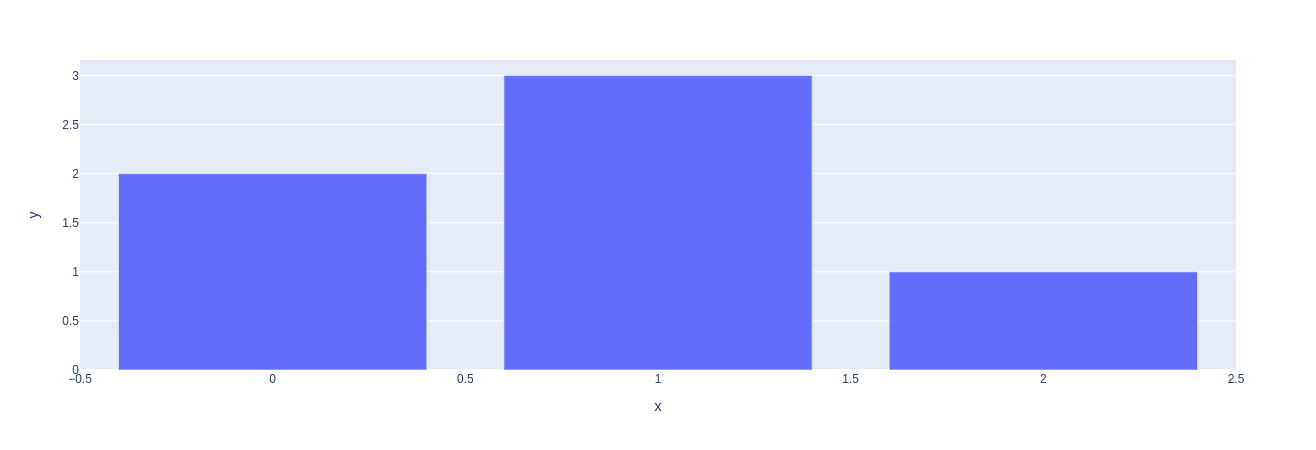

In [30]:
fig = px.bar(y=[2, 3, 1])
fig.show() # muestra el gráfico en la celda de abajo
if api_key: py.plot(fig, filename = 'fig1_online.png', auto_open=True)

---

<a id="section_privacidad"></a> 
## Privacidad

[volver a TOC](#section_toc)


Existen 3 niveles diferentes de privacidad:

* **Público**: cualquiera puede ver este gráfico. Aparecerá en el perfil y puede aparecer en los motores de búsqueda. No necesita iniciar sesión en Plotly para verlos.

* **Privado**: sólo el usuario puede ver este plot. No aparecerá en el feed de Plotly, el perfil o los motores de búsqueda. Debe haber iniciado sesión en Plotly para ver este gráfico. Puede compartir este gráfico de forma privada con otros usuarios de Plotly en su cuenta de Plotly en línea y deberán iniciar sesión para ver este gráfico.

* **Secreto**: cualquier persona con este enlace secreto puede ver esta visualización. 

Para ver cómo cambiar las opciones de privacidad pueden consultar este enlace
https://plotly.com/python/privacy/

---

A continuación presentamos la sintaxis de construcción de algunos gráficos básicos

<a id="section_bar_charts"></a> 
## Bar Charts

[volver a TOC](#section_toc)


https://plotly.com/python/bar-charts/

https://plotly.com/python-api-reference/generated/plotly.express.bar.html#plotly.express.bar

### Bar chart para una serie de datos

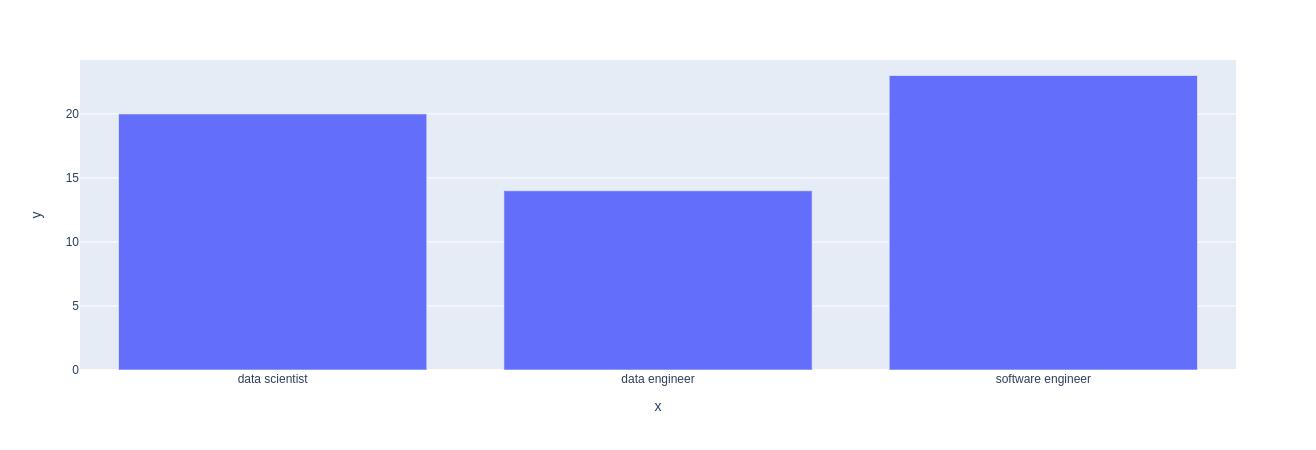

In [31]:
fig = px.bar(x=['data scientist', 'data engineer', 'software engineer'],
               y=[20, 14, 23])
fig.show()

### Bar chart agrupado 

https://plotly.com/python/bar-charts/

El valor del argumento que define que el bar chart es agrupado es `barmode='group'`

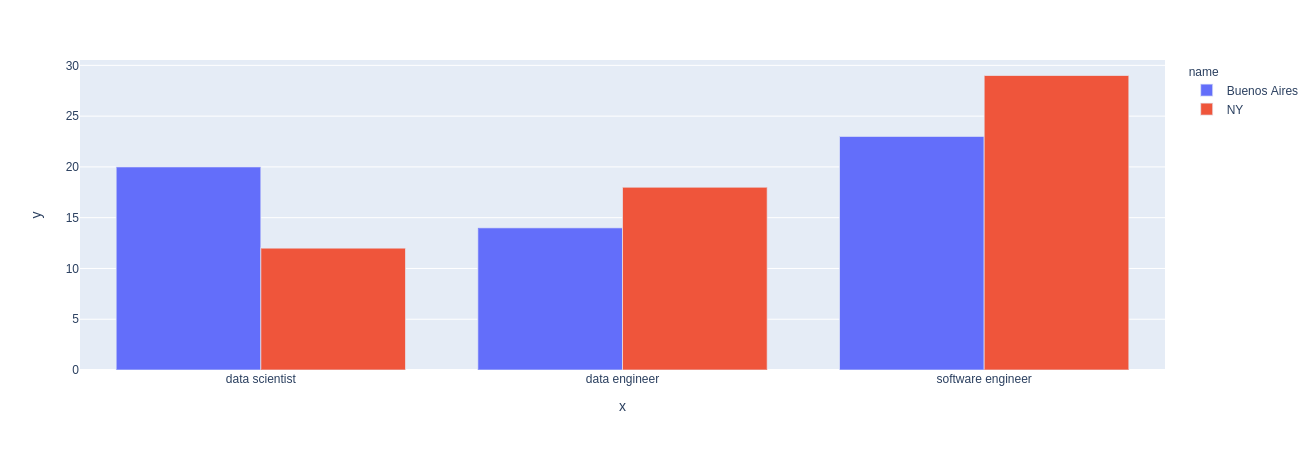

In [32]:
data_raw = pd.DataFrame(
    {'x': ['data scientist', 'data engineer', 'software engineer', 'data scientist', 'data engineer', 'software engineer'],
     'y': [20, 14, 23, 12, 18, 29],
     'name': ['Buenos Aires', 'Buenos Aires', 'Buenos Aires', 'NY', 'NY', 'NY']
    })

fig = px.bar(data_raw, x="x", y="y", color='name', barmode='group')
fig.show()

### Bar chart apilado

El valor del argumento que define que el bar chart es agrupado es `barmode='relative'`

El código es el mismo que el del ejemplo anterior.

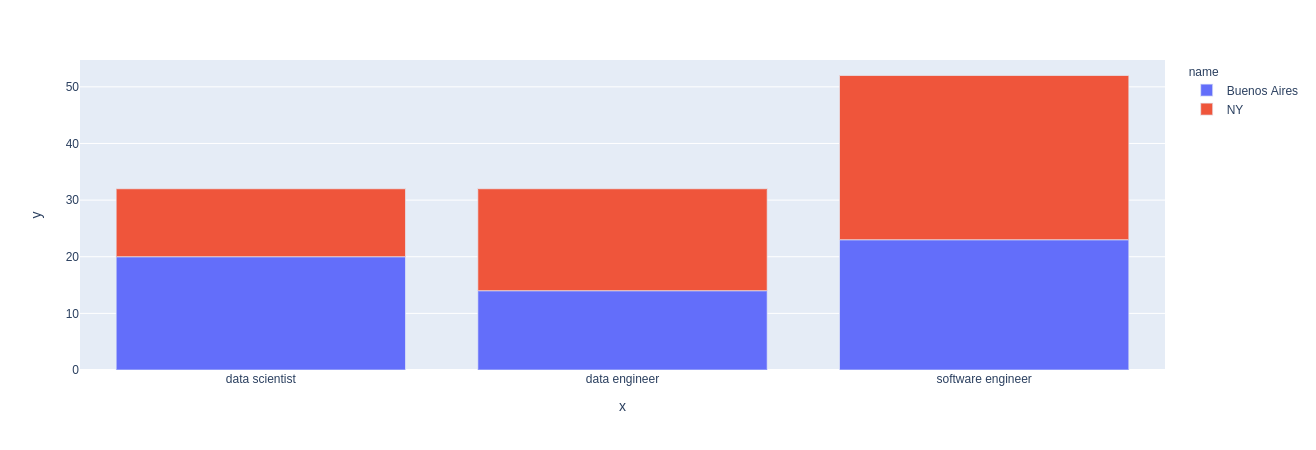

In [33]:
fig = px.bar(data_raw, x="x", y="y", color='name', barmode='relative')
fig.show()

### Bar chart con Hover text

https://plotly.com/python/hover-text-and-formatting/

Definimos el formato del contenido que aparece en hover usando un diccionario donde establecemos los valores de los atributos.

El detalle de los atributos que podemos establecer para hover en gráficos de barras y de puntos podemos verlos aquí:

https://plotly.com/python/reference/#bar-hoverlabe

https://plotly.com/python/reference/#scatter-hoverlabel



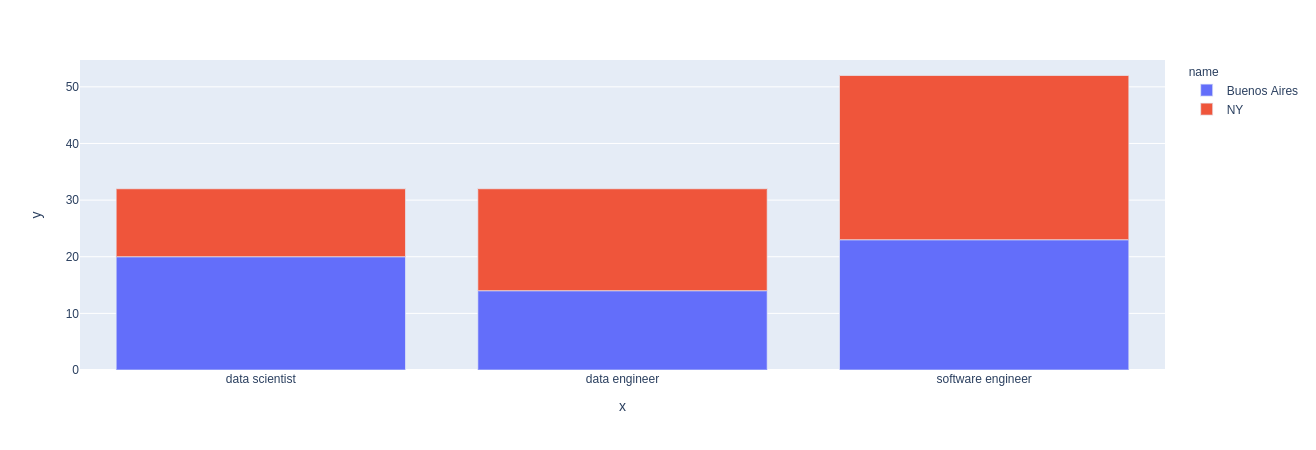

In [34]:
fig = px.bar(data_raw, x="x", y="y", color='name', barmode='relative')

fig.update_layout(
    hoverlabel=dict(
        bgcolor="white", 
        font_size=16, 
        font_family="Rockwell"
    )
)

fig.show()

<a id="section_scatter"></a> 
## Scatter

[volver a TOC](#section_toc)


https://plotly.com/python-api-reference/generated/plotly.express.scatter.html#plotly.express.scatter

### Scatter 3d

https://plotly.com/python-api-reference/generated/plotly.express.scatter_3d.html#plotly.express.scatter_3d

Vamos a generar un scatter plot 3d con datos que descargamos de https://www.wwpdb.org/.

Leemos los datos del archivo '../Data/265d.pdb' como una lista de listas y extraemos las coordenadas x, y, z de los elementos de índices 0, 1 y 2 respectivamente de cada lista elemento.


In [35]:
with open('../Data/265d.pdb') as f:
    data = [x.split()[6:9] + [x.split()[-1]] for x in f.readlines() if 'ATOM' ==  x.split()[0]]

In [36]:
x_coord = np.array(data)[:,0].astype(float)
y_coord = np.array(data)[:,1].astype(float)
z_coord = np.array(data)[:,2].astype(float)    

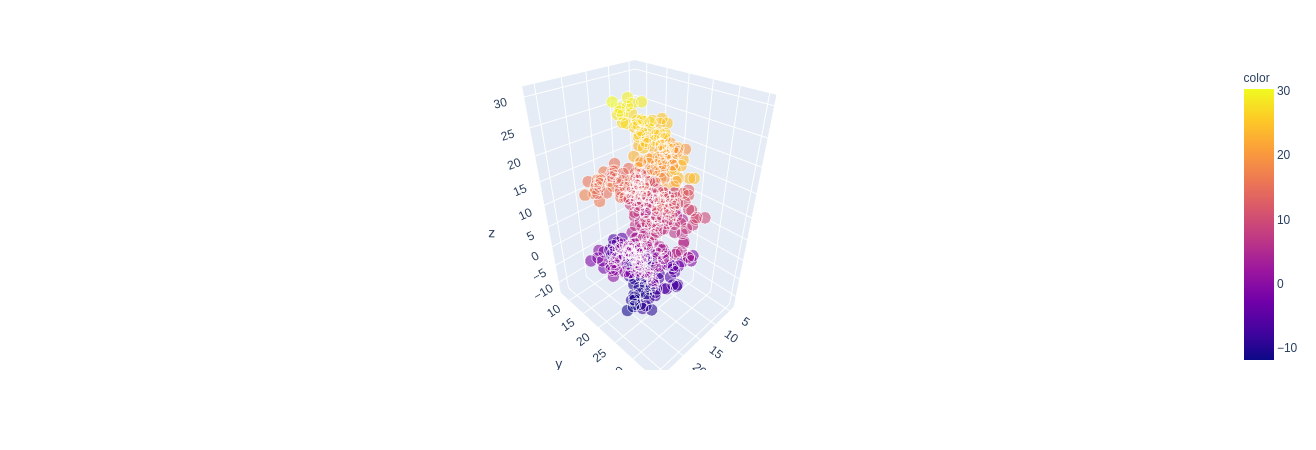

In [37]:
marks_size = [2 for i in range(len(x_coord))]

fig = px.scatter_3d(x = x_coord, y = y_coord, z = z_coord, 
              color = z_coord, color_discrete_sequence = 'Viridis',
              opacity = 0.6, size = marks_size)

fig.show()

### Bubble chart

https://plotly.com/python/bubble-charts/

https://plotly.com/python-api-reference/generated/plotly.express.scatter.html#plotly.express.scatter

Usaremos datos que informan la expectativa de vida, el producto interno bruto per cápita y la población, por año, continente y país.

Creamos un gráfico con los siguientes lineamientos:

* Scatter plot de expectativa de vida versus PIB per cápita para el año 2007 para todos los países en el dataset

* El tamaño de los marcadores es creciente en función del tamaño de la población (bubbles)

* Cada continente se representa con un color distinto

* Establecemos el valor de opacity en 0.6

In [38]:
data_gap = pd.read_csv('../Data/gapminderDataFiveYear.txt', sep='\t')

data_gap.sample(5)

,country,year,pop,continent,lifeExp,gdpPercap
1199,Paraguay,2007,6667147.0,Americas,71.752,4172.838464
1526,Thailand,1962,29263397.0,Asia,56.061,1002.199172
616,Guinea,1972,3811387.0,Africa,38.842,741.666231
906,Libya,1982,3344074.0,Africa,62.155,17364.275380
1095,New Zealand,1967,2728150.0,Oceania,71.520,14463.918930


In [39]:
data_year_mask = data_gap['year'] == 2007
data_year = data_gap.loc[data_year_mask, :] 
data_year.head()

,country,year,pop,continent,lifeExp,gdpPercap
11,Afghanistan,2007,31889923.0,Asia,43.828,974.580338
23,Albania,2007,3600523.0,Europe,76.423,5937.029526
35,Algeria,2007,33333216.0,Africa,72.301,6223.367465
47,Angola,2007,12420476.0,Africa,42.731,4797.231267
59,Argentina,2007,40301927.0,Americas,75.320,12779.379640


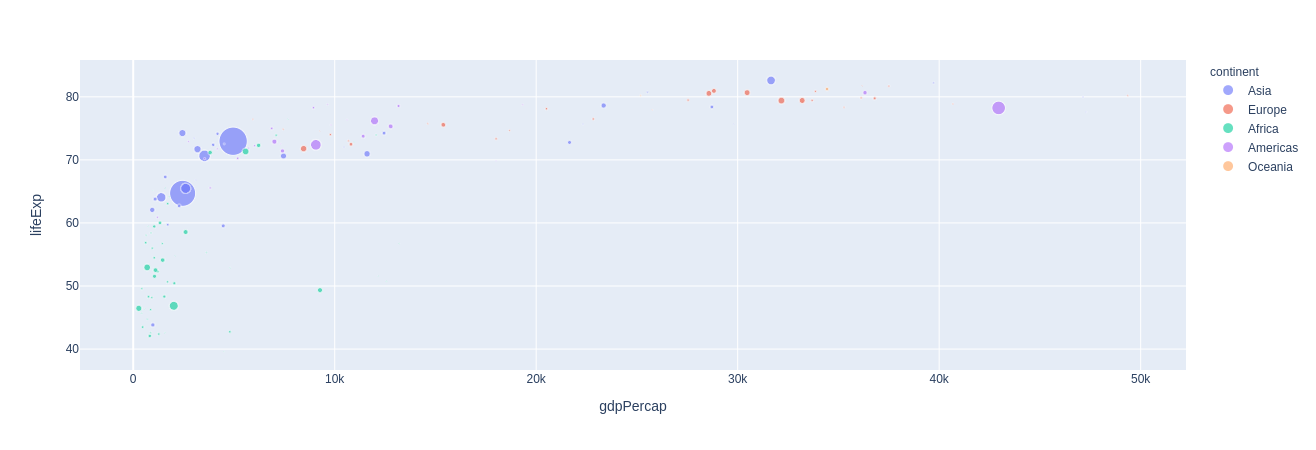

In [40]:
fig = px.scatter(data_frame = data_year, x = "gdpPercap", y = "lifeExp",
                 size = "pop", color = "continent", opacity = 0.6,
                 hover_name="country")
fig.show()

<a id="section_facets"></a> 
## Facets

[volver a TOC](#section_toc)


https://plotly.com/python/facet-plots/

https://plotly.com/python-api-reference/generated/plotly.express.scatter.html#plotly.express.scatter

El valor de `facet_col` indica el nombre de la columna cuyos valores usaremos para asignar datos a cada subplot en dirección horizontal

El valor de `facet_col_wrap` es el máximo número de columnas que tendrá el gráfico.


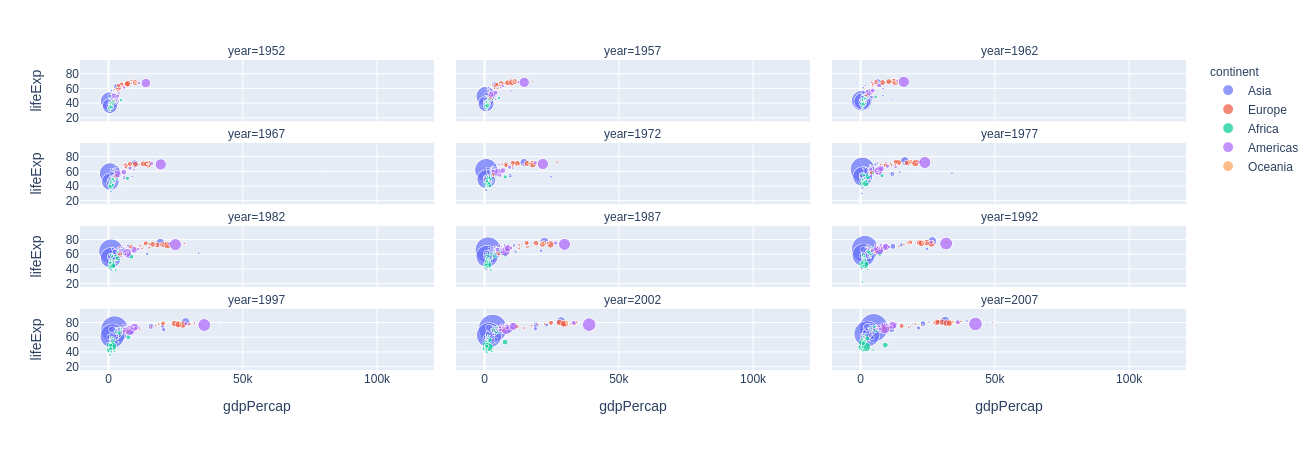

In [41]:
fig = px.scatter(data_gap, x = 'gdpPercap', y = 'lifeExp', color = 'continent', size = 'pop',
                facet_col = 'year', facet_col_wrap = 3)
fig.show()

<a id="section_animaciones"></a> 
## Animaciones

[volver a TOC](#section_toc)


https://plotly.com/python/animations/

Los valores del argumento `animation_frame` indican cuáles serán las marcas que definirán cada cuadro (frame)

Los valores del argumento `animation_group` proveen consistencia en el conjunto de frames: los registros que coinciden en el valor de animation_group serán tratadas como si describieran el mismo objeto en todos los frames.

El valor del argumetno `log_x` es True cuando la escala del eje x es logarítmica, y False sino. Es equivalente para `log_y`

`range_x` y `range_y` definen el rango de valores de los ejes x e y respectivamente

Generemos ahora una animación para cada uno de los años usando como base el bubble chart que generamos en el ejemplo anterior.

Y guardemoslo en la nube.

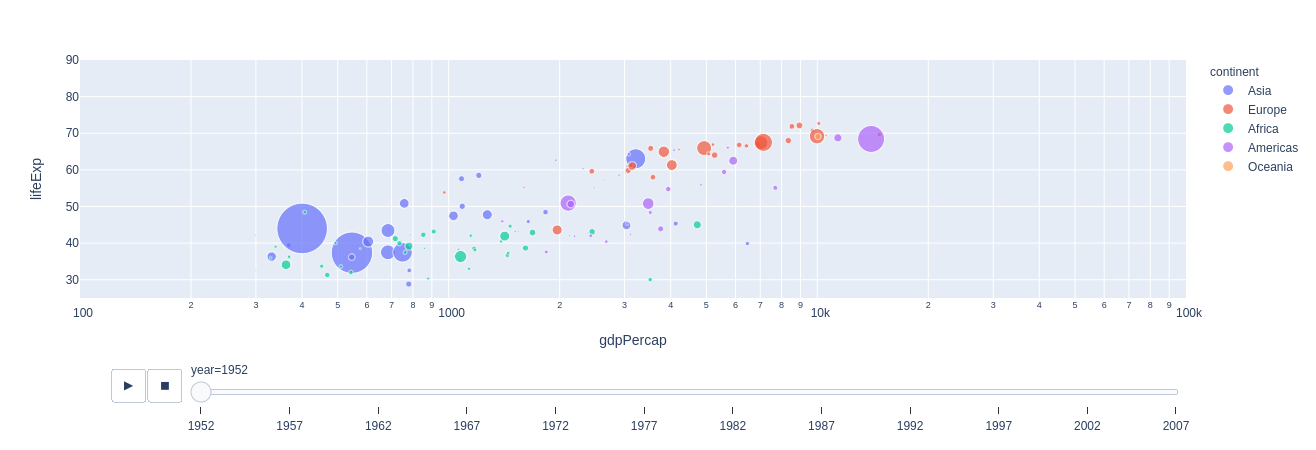

In [42]:
fig = px.scatter(data_gap, 
           x = "gdpPercap", y = "lifeExp", 
           animation_frame = "year", animation_group = "country",
           size = "pop", color = "continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])
fig.show()

In [43]:
if api_key: py.plot(fig, filename = 'gapminderDataFiveYear.png', auto_open=True)

---

<a id="section_ejercicio"></a> 
## Ejercicio

[volver a TOC](#section_toc)


Con algún dataset que elijan entre los que usamos en el curso hasta el momento, reproduzcan alguno de los plots de este post

https://towardsdatascience.com/5-visualisations-to-level-up-your-data-story-e131759c2f41

---

<a id="section_referencias"></a> 
## Referencias

[volver a TOC](#section_toc)

Tutoriales
https://plotly.com/python/plotly-fundamentals/

Galerías 
https://plotly.com/python/

https://towardsdatascience.com/plotly-express-the-good-the-bad-and-the-ugly-dc941649687c

https://medium.com/analytics-vidhya/interactive-data-visualization-became-much-easier-with-help-of-plotly-express-64c56e781b53

